In [51]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [52]:
abalone = pd.read_csv("abalone.csv", header=None, names=['Sex','Length','Diameter', 'Height','Whole weight','Shucked weight','Viscera weight','Shell weight', 'rings'])

abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## we need to change the sex to an int so that we can use the classification algorithms

we'll change 'M' to 0, 'F' to 1 and 'I'to 2

In [53]:
abalone['Sex'].replace('M', 0, inplace=True)
abalone['Sex'].replace('F', 1, inplace=True)
abalone['Sex'].replace('I', 2, inplace=True)


abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA
## create the data and target dataframes

the number of rings is the age, which is what we're trying to predict

In [56]:
X = abalone.drop('rings', axis='columns')
y = abalone['rings']

In [ ]:
# try do make a basic scatter matrix plot, very messy
scatter_matrix = pd.plotting.scatter_matrix(abalone)

/var/folders/t7/n_c5tq1n0h985pbhlhf2w0c80000gn/T/ipykernel_54961/4118537949.py:4: UserWarning: Legend does not support array([<AxesSubplot:xlabel='Sex', ylabel='Sex'>,
       <AxesSubplot:xlabel='Length', ylabel='Sex'>,
       <AxesSubplot:xlabel='Diameter', ylabel='Sex'>,
       <AxesSubplot:xlabel='Height', ylabel='Sex'>,
       <AxesSubplot:xlabel='Whole weight', ylabel='Sex'>,
       <AxesSubplot:xlabel='Shucked weight', ylabel='Sex'>,
       <AxesSubplot:xlabel='Viscera weight', ylabel='Sex'>,
       <AxesSubplot:xlabel='Shell weight', ylabel='Sex'>], dtype=object) instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(vis, y)
/var/folders/t7/n_c5tq1n0h985pbhlhf2w0c80000gn/T/ipykernel_54961/4118537949.py:4: UserWarning: Legend does not support array([<AxesSubplot:xlabel='Sex', ylabel='Length'>,
       <AxesSubplot:xlabel='Length', ylabel='Length'>,
    

array([[<AxesSubplot:xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot:xlabel='Length', ylabel='Sex'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Sex'>,
        <AxesSubplot:xlabel='Height', ylabel='Sex'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Sex'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Sex'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Sex'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Sex'>],
       [<AxesSubplot:xlabel='Sex', ylabel='Length'>,
        <AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Length'>,
        <AxesSubplot:xlabel='Height', ylabel='Length'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Length'>],
       [<AxesSubplot:xlabel='Sex', ylabel='Diameter'>,
        <AxesSubp

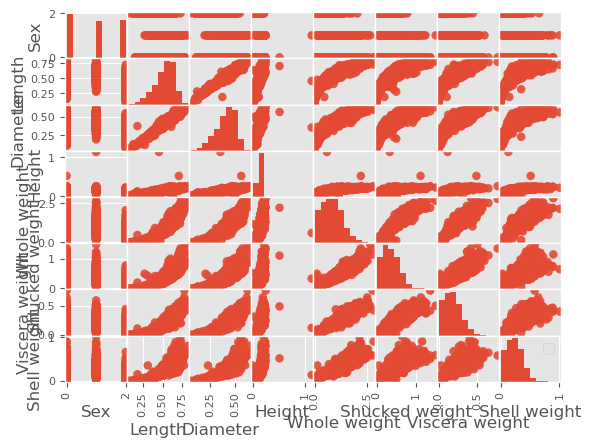

<Figure size 640x480 with 0 Axes>

In [64]:
# playing around with the parameters of scatter_matrix

vis = pd.plotting.scatter_matrix(X, alpha=0.9, s=150)
plt.legend(vis, y)
plt.figure()
vis

# k-NN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
X.shape

(4177, 8)

In [ ]:
y.shape

(4177,)

## Measuring Model Performance
Train/Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# stratify makes sure there are equal numbers of each class in the split

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
print(f"Test set predictions: {y_pred}")

Test set predictions: [ 9  9 12 ...  8  9  7]


In [ ]:
knn.score(X_test, y_test)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.24003189792663476

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

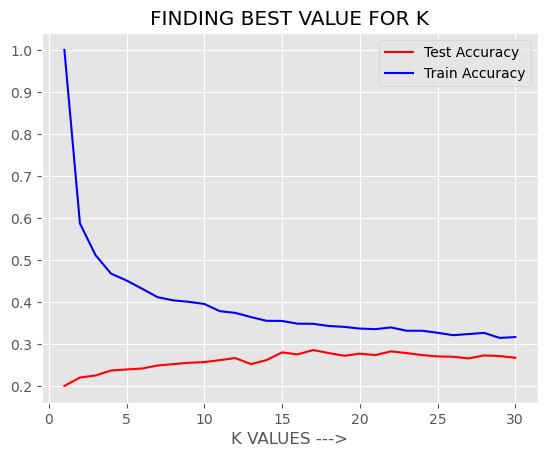

In [ ]:
# This code may not run on GFG
# As required modules are not found.
  
# To plot test accuracy and train accuracy Vs K value.
p = list(range(1, 31))
lst_test =[]
lst_train =[]
for i in p:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    z = knn.score(X_test, y_test)
    t = knn.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)
      
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('K VALUES --->')
plt.title('FINDING BEST VALUE FOR K')
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
iris['target_names']

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
# for i in range(len(cm)):
#     print(f"row {i}: {cm[i]}")
#     for j in cm[i]:
#         print(j)

In [ ]:
print(classification_report(y_test, y_pred))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred[:20]

# The ROC curve

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [ ]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X.shape

In [ ]:
150/5

In [ ]:
param_grid = {
        'n_neighbors': np.arange(1, 50), 
        "algorithm": ["ball_tree", "kd_tree", "brute"]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid)
knn_cv.fit(X, y)
knn_cv.best_params_

In [ ]:
knn_cv.best_score_

## Pre-processing Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('auto.csv')
df_origin = pd.get_dummies(df)

In [ ]:
df.head()

In [ ]:
df_origin.head()

In [ ]:
df_origin = df_origin.drop('origin_Asia', axis=1)
df_origin.head()

In [ ]:
X = df_origin.drop('mpg', axis=1)
y = df_origin['mpg']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

In [ ]:
ridge.score(X_test, y_test)

In [ ]:
new_values = []
for index, row in df.iterrows():
    if row['origin'] == "US":
        new_values.append(0)
    elif row['origin'] == "Asia":
        new_values.append(1)
    elif row['origin'] == "Europe":
        new_values.append(2)

df['labels'] = new_values
df.head()


In [ ]:
# this is one way to change US to 1 in the dataframe
df.loc[df['origin'] == 'US', 'origin'] = 1

df

## Handling Missing Data

In [ ]:
df = pd.read_csv('diabetes.csv')
df.info()

In [ ]:
df.head()

In [ ]:
df['insulin'].replace(0, np.nan, inplace=True)
df['triceps'].replace(0, np.nan, inplace=True)
df['bmi'].replace(0, np.nan, inplace=True)
df.head()

In [ ]:
df = df.dropna()
df.shape

In [ ]:
X = df

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)

In [ ]:
X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = LogisticRegression()
steps = [('imputation', imp), ('logistic_regression', logreg)]
pipeline = Pipeline(steps)



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

In [ ]:
pipeline.score(X_test, y_test)

## Centring and Scaling Data

In [ ]:
df = pd.read_csv('redwine.csv', sep=';')
df.describe()

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
X = df
X_scaled = scale(X)
print(f"Prescaled mean: \n{np.mean(X)},\nstd:\n{np.std(X)}\n")
print(f"Post scaled mean: \n{np.mean(X_scaled)},\nstd:\n{np.std(X_scaled)}")

In [ ]:
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

## Decision Tree

In [ ]:
# Run this program on your local python
# interpreter, provided you have installed
# the required libraries.

# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# Function importing Dataset
def importdata():
	balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
	                            sep= ',', header = None)
	
	# Printing the dataswet shape
	print ("Dataset Length: ", len(balance_data))
	print ("Dataset Shape: ", balance_data.shape)
	
	# Printing the dataset obseravtions
	print ("Dataset: ",balance_data.head())
	return balance_data

# Function to split the dataset
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size = 0.3, random_state = 100)
	
	return X, Y, X_train, X_test, y_train, y_test
	
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini
	
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(
			criterion = "entropy", random_state = 100,
			max_depth = 3, min_samples_leaf = 5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

	# Predicton on test with giniIndex
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred
	
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
	
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	
	print ("Accuracy : ",
	accuracy_score(y_test,y_pred)*100)
	
	print("Report : ",
	classification_report(y_test, y_pred))

In [ ]:
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

# Operational Phase
print("Results Using Gini Index:")

# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)